In [2]:
import win32com.client as client
import re
import pandas as pd
import numpy as np
import string
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# startup outlook instance
outlook = client.Dispatch('Outlook.Application')

In [4]:
# get namespace so that we can access folders
namespace = outlook.GetNameSpace('MAPI')

In [5]:
# get the inbox folder, specifically
account = namespace.Folders['youremail@gmail.com']

In [6]:
# get the inbox folder, specifically
inbox = account.Folders['Inbox'] 

In [7]:
#inbox email count
inbox.Items.Count

1739

In [8]:
#get all messages in inbox
messages = [message for message in inbox.Items]

In [9]:
#add a new folder to move spam into
sp_folder = inbox.Folders.Add("SpamEmails")

In [10]:
#Let's load the package
load_clf = pickle.load(open('email_class.pkl', 'rb'))
#load count vectorizer
count_vect = pickle.load(open('count_vect', 'rb'))

In [11]:
#len(messages)
ham = []
spam = []
counter = 0
df = pd.DataFrame(columns=['spam', 'message', 'No'])
for message in messages:
    counter = counter + 1
    #print(message.body)
    # Search email HTML for body text
    cleanre = re.compile('<.*?>')
    cleantext = re.sub(cleanre, '', message.body)
    cleantext = cleantext.strip()
    data = [cleantext]
    emails_count = count_vect.transform(data)
    test = load_clf.predict(emails_count)
    for i in test:
        if i == 0:
            print("ham")
            df.loc[len(df)] = ["ham", cleantext, counter]
        elif i == 1:
            print("spam")
            df.loc[len(df)] = ["spam", cleantext, counter]
            #
            # move the messages to the new folder
            try:
                message.Move(sp_folder)
            except:
                print("Failed to move this message.")
    #print("Email No: " + str(i) + " " +  cleantext)
    #rows.append([cleantext.strip(), i ])
    print(counter)

spam
1
spam
2
spam
3
spam
4
spam
5
spam
6
spam
7
spam
8
spam
9
ham
10
ham
11
spam
12
spam
13
spam
14
spam
15
spam
16
ham
17
spam
18
spam
19
spam
20
spam
21
spam
22
spam
23
spam
24
spam
25
spam
26
ham
27
ham
28
ham
29
ham
30
spam
31
ham
32
ham
33
ham
34
ham
35
ham
36
ham
37
ham
38
ham
39
ham
40
ham
41
ham
42
ham
43
ham
44
ham
45
ham
46
ham
47
ham
48
ham
49
ham
50
ham
51
ham
52
ham
53
ham
54
ham
55
ham
56
ham
57
ham
58
ham
59
ham
60
ham
61
ham
62
ham
63
ham
64
ham
65
ham
66
ham
67
ham
68
ham
69
ham
70
ham
71
ham
72
ham
73
ham
74
ham
75
ham
76
ham
77
ham
78
spam
79
ham
80
ham
81
ham
82
ham
83
ham
84
ham
85
ham
86
ham
87
ham
88
spam
89
ham
90
ham
91
ham
92
ham
93
ham
94
spam
95
ham
96
ham
97
ham
98
ham
99
ham
100
ham
101
ham
102
ham
103
ham
104
ham
105
ham
106
spam
107
ham
108
ham
109
ham
110
ham
111
ham
112
ham
113
ham
114
ham
115
ham
116
ham
117
ham
118
ham
119
ham
120
ham
121
ham
122
ham
123
ham
124
ham
125
ham
126
ham
127
ham
128
ham
129
ham
130
ham
131
ham
132
ham
133
ham
134
ham
135


961
spam
962
spam
963
spam
964
spam
965
spam
966
spam
967
spam
968
spam
969
spam
970
spam
971
ham
972
spam
973
spam
974
spam
975
spam
976
spam
977
spam
978
spam
979
spam
980
spam
981
spam
982
spam
983
spam
984
spam
985
spam
986
spam
987
spam
988
spam
989
spam
990
spam
991
spam
992
spam
993
spam
994
spam
995
spam
996
spam
997
spam
998
ham
999
spam
1000
spam
1001
spam
1002
spam
1003
spam
1004
spam
1005
spam
1006
spam
1007
spam
1008
spam
1009
ham
1010
spam
1011
spam
1012
spam
1013
spam
1014
spam
1015
spam
1016
spam
1017
spam
1018
spam
1019
spam
1020
spam
1021
spam
1022
spam
1023
spam
1024
spam
1025
spam
1026
spam
1027
spam
1028
spam
1029
spam
1030
spam
1031
spam
1032
spam
1033
spam
1034
spam
1035
spam
1036
spam
1037
spam
1038
spam
1039
spam
1040
spam
1041
spam
1042
spam
1043
spam
1044
spam
1045
ham
1046
spam
1047
spam
1048
spam
1049
spam
1050
spam
1051
spam
1052
spam
1053
spam
1054
spam
1055
spam
1056
spam
1057
spam
1058
spam
1059
spam
1060
spam
1061
ham
1062
spam
1063
spam
1064
spam
1065

In [12]:
# preview the dataframe
df.head()

,spam,message,No
0,spam,25% OFF + FREE Full Moon kit ...,1
1,spam,Stories for Highqu \r\n@highq4u ·Become a me...,2
2,spam,In super soft cotton.\r\n ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ...,3
3,spam,"News on Swiss Re, Brightcove, Electric, Argo G...",4
4,spam,End the summer right with major savings on all...,5


In [13]:
#save the dataframe to file
df.to_csv("gmail_spam_emails.csv")

In [14]:
#get email count by 
df["spam"].value_counts()

spam    1372
ham      367
Name: spam, dtype: int64

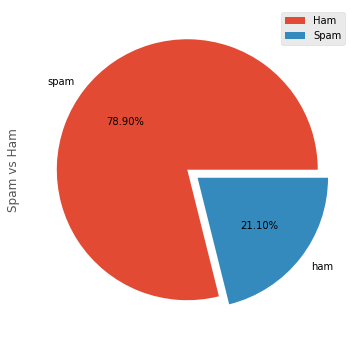

In [15]:
#plot the data
df["spam"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [18]:
#plot histogram...